<a href="https://colab.research.google.com/github/remizah/CognoRise_DataScience_Internship/blob/main/CognoRise_DS_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [22]:

# Load the dataset with appropriate encoding
try:
    df = pd.read_csv('/content/TeePublic_review.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/TeePublic_review.csv', encoding='latin1')


In [23]:

# Explore the dataset
print(df.head())
print(df.info())


   reviewer_id store_location   latitude   longitude  date  month  \
0          0.0             US  37.090240  -95.712891  2023      6   
1          1.0             US  37.090240  -95.712891  2023      6   
2          2.0             US  37.090240  -95.712891  2023      6   
3          3.0             US  37.090240  -95.712891  2023      6   
4          4.0             CA  56.130366 -106.346771  2023      6   

            year                                          title  \
0  2015 00:00:00                     Great help with lost order   
1  2024 00:00:00  I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2  2017 00:00:00    These guys offer the best customerï¿½ï¿½ï¿½   
3  2024 00:00:00                                     Good Stuff   
4  2023 00:00:00     My order arrived in a good timelyï¿½ï¿½ï¿½   

                                              review  review-label  
0  I had an order that was lost in transit. When ...             5  
1  I ordered the wrong size tee and had diff

In [24]:

# Check for missing values
print(df.isnull().sum())



reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64


In [25]:

# Drop rows with missing values
df.dropna(inplace=True)



In [26]:

# Verify that there are no missing values left
print(df.isnull().sum())


reviewer_id       0
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64


In [27]:

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


In [28]:

# Extract additional time features
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year



In [29]:
# Encode the review labels
label_encoder = LabelEncoder()
df['review-label'] = label_encoder.fit_transform(df['review-label'])



In [30]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf.fit_transform(df['review'])



In [31]:
# Target variable
y = df['review-label']


In [32]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Make predictions
y_pred = model.predict(X_test)



In [35]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8054040954804313
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.66      0.62      3375
           1       0.36      0.13      0.20      2203
           2       0.40      0.31      0.35      3150
           3       0.50      0.26      0.34      4657
           4       0.88      0.97      0.92     36133

    accuracy                           0.81     49518
   macro avg       0.54      0.47      0.49     49518
weighted avg       0.77      0.81      0.78     49518

Confusion Matrix:
 [[ 2232   224   317    48   554]
 [  828   296   528    99   452]
 [  478   235   967   451  1019]
 [  148    47   475  1212  2775]
 [  184    22   154   598 35175]]


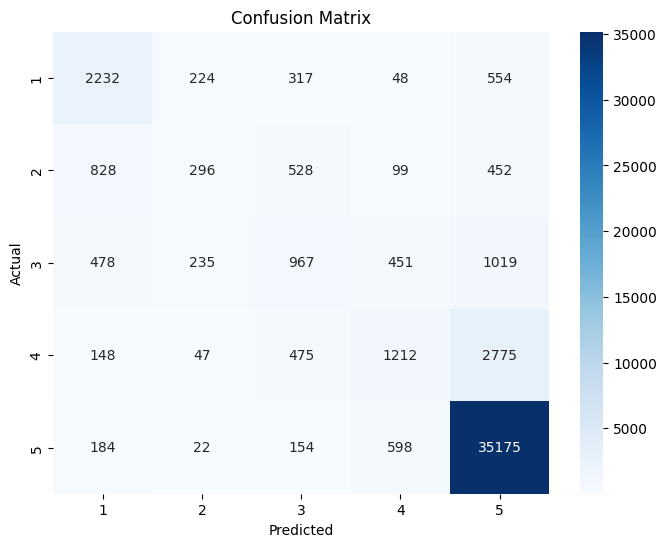

In [36]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()